In [34]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Create the data
---
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification


In [35]:
    X,y = make_classification(n_samples=1000, n_features=2,
                        n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                        n_clusters_per_class=2, weights=None, flip_y=0.01,
                        class_sep=2.0, hypercube=True, shift=0.0, scale=1.0,
                        shuffle=True, random_state=42)

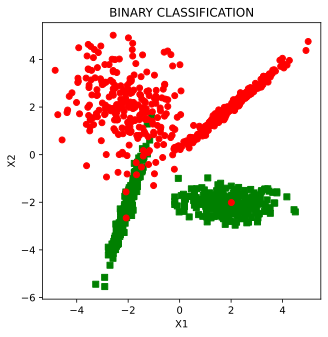

In [36]:
# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [37]:
def CreateModel(learningRate):

  # model architecture
  ANN = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
        )

  # loss function
  lossfunc = nn.BCEWithLogitsLoss()

  # optimizer
  optim = torch.optim.SGD(ANN.parameters(),lr=learningRate)

  # model output
  return ANN,lossfunc,optim

In [38]:
# a function that trains the model

# a fixed parameter
epochs = 1000

def train(ANNmodel):

    # initialize losses
    losses = torch.zeros(epochs)

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANNmodel(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()



    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc

# Single Experiment

Final accuracy: 97.2%


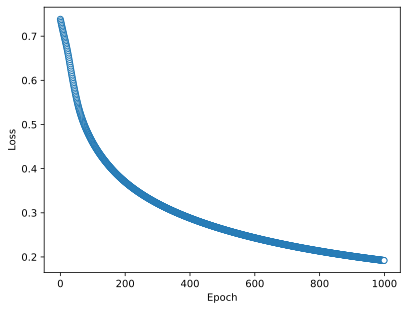

In [39]:
# create everything
ANN,lossfunc,optim = CreateModel(.01)

# run it
losses,predictions,totalacc = train(ANN)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Multiple Experiment

In [40]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,10)
learningrates = np.round(learningrates, 2)
# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),epochs))


# loop through learning rates
for i,lr in enumerate(learningrates):

    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()


/tmp/ipython-input-280207152.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


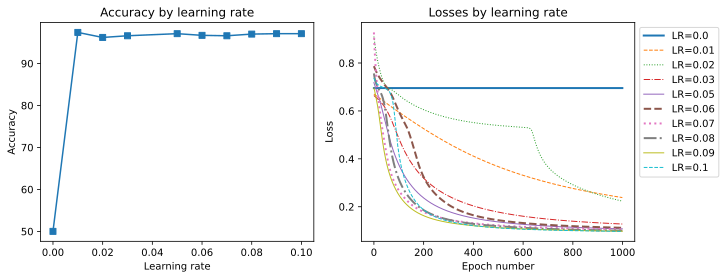

In [41]:
# Create a colormap
cmap = plt.get_cmap('tab10')

# Define custom line styles
line_styles = [
    ('-', 2),   # Solid line, bold
    ('--', 1),  # Dashed line, normal
    (':', 1),   # Dotted line, normal
    ('-.', 1),  # Dash-dot line, normal
    ('-', 1),   # Solid line, normal
    ('--', 2),  # Dashed line, bold
    (':', 2),   # Dotted line, bold
    ('-.', 2),  # Dash-dot line, bold
    ('-', 1),   # Solid line, normal
    ('--', 1)   # Dashed line, normal
]

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

# Plot losses by learning rate with customized line styles
for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

# Add legend outside of the second subplot
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [42]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9000)

# Run a meta-experiment to get more reliable results

In [ ]:
# Number of experiments to conduct
Exps = 100

# Storing the results
# Instiate at zero
accMeta = np.zeros((Exps,len(learningrates)))

# fnumber of epochs
epochs = 1000

# now for the experiment
for i in range(Exps):
  for j,lr in enumerate(learningrates):

    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accMeta[i,j] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

# Experiments
---

1) Recreate the experiment with the learning rate starting from 0.1 and ends in 0.9 with increments of 0.1.

2) Play around with the make_classifier function, create clean and noisy data by manipulating the class separation (class_sep). How does it affect the outcome of the learning rate vs loss?

3) Create a heat map that shows the relationship of the learning rate on the x-axis and the number of experiment on the y-axis.

In [ ]:
import seaborn as sns
# For clean data, class_sep=2.0; for noisy data, class_sep=0.5
class_sep_value = 2.0  # change to 0.5 for noisy data
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
    n_clusters_per_class=2, weights=None, flip_y=0.01,
    class_sep=class_sep_value, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=42
)

# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'gs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# -------------------------------
# Create model function
# -------------------------------
def CreateModel(learningRate):
    ANN = nn.Sequential(
        nn.Linear(2,1),   # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(1,1),   # output unit
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optim

# -------------------------------
# Training function
# -------------------------------
epochs = 1000
def train(ANNmodel):
    losses = torch.zeros(epochs)
    for i in range(epochs):
        pred = ANNmodel(data)
        loss = lossfunc(pred, labels)
        losses[i] = loss
        optim.zero_grad()
        loss.backward()
        optim.step()
    predictions = ANNmodel(data)
    totalacc = 100 * torch.mean(((predictions>0) == labels).float())
    return losses, predictions, totalacc

# -------------------------------
# Single Experiment
# -------------------------------
ANN, lossfunc, optim = CreateModel(.01)
losses, predictions, totalacc = train(ANN)
print('Final accuracy: %g%%' % totalacc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# -------------------------------
# Multiple Experiments (learning rates 0.1 -> 0.9)
# -------------------------------
learningrates = np.arange(0.1, 1.0, 0.1)  # changed here
accByLR = []
allLosses = np.zeros((len(learningrates), epochs))

for i, lr in enumerate(learningrates):
    ANN, lossfunc, optim = CreateModel(lr)
    losses, predictions, totalacc = train(ANN)
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach().numpy()

# plot results
cmap = plt.get_cmap('tab10')
line_styles = [
    ('-', 2), ('--', 1), (':', 1), ('-.', 1),
    ('-', 1), ('--', 2), (':', 2), ('-.', 2), ('-', 1)
]

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout(rect=[0,0,0.85,1])
plt.show()

# proportion of runs where accuracy >=70%
print('Proportion of runs >=70%:', sum(torch.tensor(accByLR)>70)/len(accByLR))

# -------------------------------
# Meta-Experiment
# -------------------------------
Exps = 100
accMeta = np.zeros((Exps,len(learningrates)))

for i in range(Exps):
    for j, lr in enumerate(learningrates):
        ANN, lossfunc, optim = CreateModel(lr)
        losses, predictions, totalacc = train(ANN)
        accMeta[i,j] = totalacc

# plot averaged results
plt.plot(learningrates, np.mean(accMeta, axis=0), 's-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Average Accuracy by Learning Rate (Meta-Experiment)')
plt.show()

# -------------------------------
# Heatmap of Accuracy
# -------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(accMeta, cmap='viridis', xticklabels=learningrates, yticklabels=np.arange(1,Exps+1))
plt.xlabel('Learning Rate')
plt.ylabel('Experiment Number')
plt.title('Accuracy Heatmap: Learning Rate vs Experiment')
plt.show()